<a href="https://colab.research.google.com/github/DrDourado/UofL_ME_613_ML_Course/blob/main/ME_613_03_Introduction_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook illustrates the basic concepts of convolutional neural networks (CNNs) using the [CIFAR-10](https://https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data) dataset to demonstrate a classification example.

In this notebook:

1. We load the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes (e.g., airplane, automobile, bird, etc.).
2. We preprocess the data by normalizing pixel values to the range [0, 1].
3. We define a CNN architecture with three convolutional layers followed by max pooling layers, and then fully connected layers with ReLU activation functions.
4. We compile the model using the Adam optimizer and categorical cross-entropy loss function, which is suitable for multi-class classification problems.
5. We train the model on the training data for 10 epochs with a batch size of 64 and a validation split of 10%.
6. We evaluate the trained model on the test data and print the test accuracy.
7. We plot the training and validation accuracy and loss curves to visualize the training history.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)
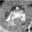

In [7]:
X_train[0,:,:,0]

In [4]:
y_train[0:15,0]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9], dtype=uint8)

In [8]:
# Preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train[0,:,:,0]

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787, 0.59607846,
        0.5803922 ],
       [0.0627451 , 0.        , 0.07058824, ..., 0.48235294, 0.46666667,
        0.47843137],
       [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 , 0.47058824,
        0.42745098],
       ...,
       [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  , 0.21960784,
        0.20784314],
       [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864, 0.38039216,
        0.3254902 ],
       [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883, 0.5921569 ,
        0.48235294]], dtype=float32)

In [11]:
y_train[0:5,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

A convolutional layer is a fundamental building block of convolutional neural networks (CNNs) used primarily in computer vision tasks, such as image recognition, object detection, and segmentation. Convolutional layers apply convolution operations to input data, extracting features through a process of filtering and feature mapping. Here's a detailed explanation of what a convolutional layer is and how it works:

1. **Convolution Operation:**
At the core of a convolutional layer is the convolution operation. Convolution involves sliding a small filter (also known as a kernel or a convolutional kernel) over the input data and computing the dot product between the filter and the overlapping region of the input. The filter acts as a feature detector, capturing local patterns such as edges, textures, or shapes.
2. **Filters and Feature Maps:**
A convolutional layer consists of multiple filters, each responsible for detecting a specific pattern or feature in the input data. During the convolution operation, each filter is convolved with the input data to produce a feature map. Each element in the feature map represents the result of applying the filter to a local region of the input.
3. **Strides:**
The convolution operation can be performed with a specified stride, which determines the step size of the filter as it slides across the input data. A larger stride results in a smaller output size, while a smaller stride leads to a larger output size.
4. **Padding:**
Padding is often applied to the input data before performing convolution to preserve spatial dimensions and prevent information loss at the edges of the input. Padding involves adding zeros or other values around the input data, effectively increasing its size.
5. **Non-linearity (Activation Function):**
After the convolution operation, a non-linear activation function (such as ReLU, Sigmoid, or Tanh) is applied element-wise to the feature map. The activation function introduces non-linearity to the network, allowing it to learn complex patterns and relationships in the data.
6. **Pooling Layers:**
In CNNs, convolutional layers are often followed by pooling layers, which downsample the feature maps, reducing their spatial dimensions while retaining the most important information. Max pooling and average pooling are common pooling operations used to extract dominant features from the feature maps.
7. **Feature Hierarchy:**
Convolutional layers in CNNs are typically organized into multiple stacks or blocks, with each successive layer learning increasingly abstract and complex features by combining information from previous layers. This hierarchical feature extraction enables CNNs to effectively capture hierarchical patterns in the input data.

In summary, a convolutional layer in a CNN applies convolution operations to input data using filters to extract features, followed by non-linear activation functions and optional pooling operations. These layers play a crucial role in learning hierarchical representations of input data, making CNNs highly effective for tasks such as image classification and object recognition.






1/1 [==============================] - 0s 59ms/step


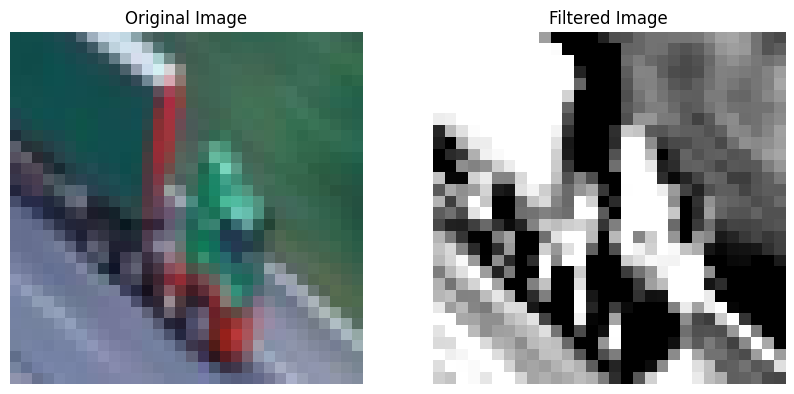

In [33]:
# Select an image from the dataset
image_index = 50
image = X_train[image_index]

# Reshape the image to add a batch dimension
image = np.expand_dims(image, axis=0)

# Define custom filter weights
# These are simple edge detection filters
filters = np.array([
    [[-1, -1, -1], [0, 0, 0], [1, 1, 1]],  # Vertical edge detector
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],  # Horizontal edge detector
    [[-1, -1, 0], [-1, 0, 1], [0, 1, 1]],  # Diagonal edge detector
])

# Expand the filter weights to match the number of input channels
filters = np.repeat(filters[:, :, :, np.newaxis], 3, axis=-1)

# Create a simple CNN model with a single convolutional layer
model = Sequential([
    Conv2D(3, (3, 3), activation='relu', input_shape=(32, 32, 3), weights=[filters, np.zeros(3)])
])

# Apply the convolutional layer to the image
filtered_image = model.predict(image)

# Visualize the original image and the filtered image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(X_train[image_index])
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image[0])
plt.title('Filtered Image')
plt.axis('off')

plt.show()

1/1 [==============================] - 0s 77ms/step


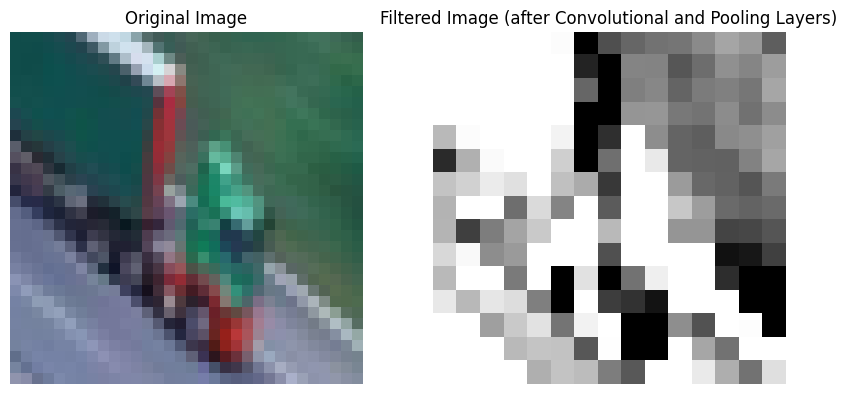

In [34]:
# Create a simple CNN model with a convolutional layer followed by a max pooling layer
model_pool = Sequential([
    Conv2D(3, (3, 3), activation='relu', input_shape=(32, 32, 3), weights=[filters, np.zeros(3)]),
    MaxPooling2D((2, 2))
])

# Apply the convolutional and pooling layers to the image
pooled_image = model_pool.predict(image)

# Visualize the original image and the filtered image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(X_train[image_index])
plt.title('Original Image')
plt.axis('off')

# Filtered image (after convolutional and pooling layers)
plt.subplot(1, 2, 2)
plt.imshow(pooled_image[0])
plt.title('Filtered Image (after Convolutional and Pooling Layers)')
plt.axis('off')

plt.show()

In [13]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/10
704/704 [==============================] - 62s 86ms/step - loss: 1.6213 - accuracy: 0.4087 - val_loss: 1.3935 - val_accuracy: 0.5008
Epoch 2/10
704/704 [==============================] - 67s 96ms/step - loss: 1.2830 - accuracy: 0.5422 - val_loss: 1.1712 - val_accuracy: 0.5800
Epoch 3/10
704/704 [==============================] - 57s 82ms/step - loss: 1.1319 - accuracy: 0.5995 - val_loss: 1.1613 - val_accuracy: 0.5830
Epoch 4/10
704/704 [==============================] - 57s 81ms/step - loss: 1.0264 - accuracy: 0.6386 - val_loss: 1.0011 - val_accuracy: 0.6446
Epoch 5/10
704/704 [==============================] - 58s 82ms/step - loss: 0.9497 - accuracy: 0.6683 - val_loss: 0.9544 - val_accuracy: 0.6714
Epoch 6/10
704/704 [==============================] - 57s 81ms/step - loss: 0.8886 - accuracy: 0.6889 - val_loss: 0.9838 - val_accuracy: 0.6610
Epoch 7/10
704/704 [==============================] - 56s 80ms/step - loss: 0.8449 - accuracy: 0.7055 - val_loss: 0.8737 - val_accuracy:

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 0.6934999823570251


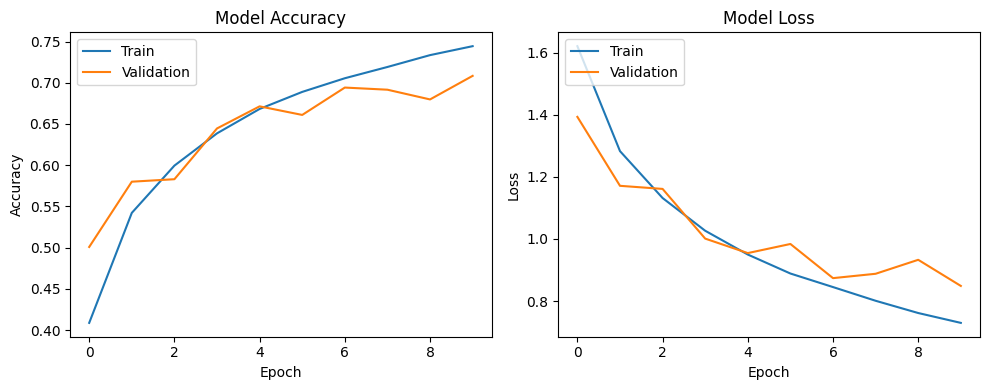

In [16]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()